<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [42]:
# Importing pandas and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the Netflix CSV as a DataFrame
df = pd.read_csv("netflix_data.csv")

In [43]:
# Start coding here! Use as many cells as you like
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [44]:
# Check for missing values
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [45]:
# Check for unique values in the 'release_year' column to understand its distribution
df['release_year'].unique()

array([2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2020, 2015,
       2010, 2005, 2012, 2006, 2013, 2000, 1989, 2004, 1977, 1971, 1993,
       2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974, 2001,
       1999, 1966, 1991, 1982, 1994, 2003, 1995, 1978, 1992, 1972, 1975,
       1973, 1967, 1960, 1981, 1958, 1976, 2021, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1969, 1955, 1963, 1964, 1942,
       1954, 1970, 1947, 1944, 1959])

In [46]:
# Drop rows with missing 'release_year' or 'title'
df.dropna(subset=['release_year', 'title'], inplace=True)

In [47]:
# Filter the dataset for shows released between 1990 and 1999
df_1990s = df[(df['release_year'] >= 1990) & (df['release_year'] <= 1999)]

# Inspect the filtered data
df_1990s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


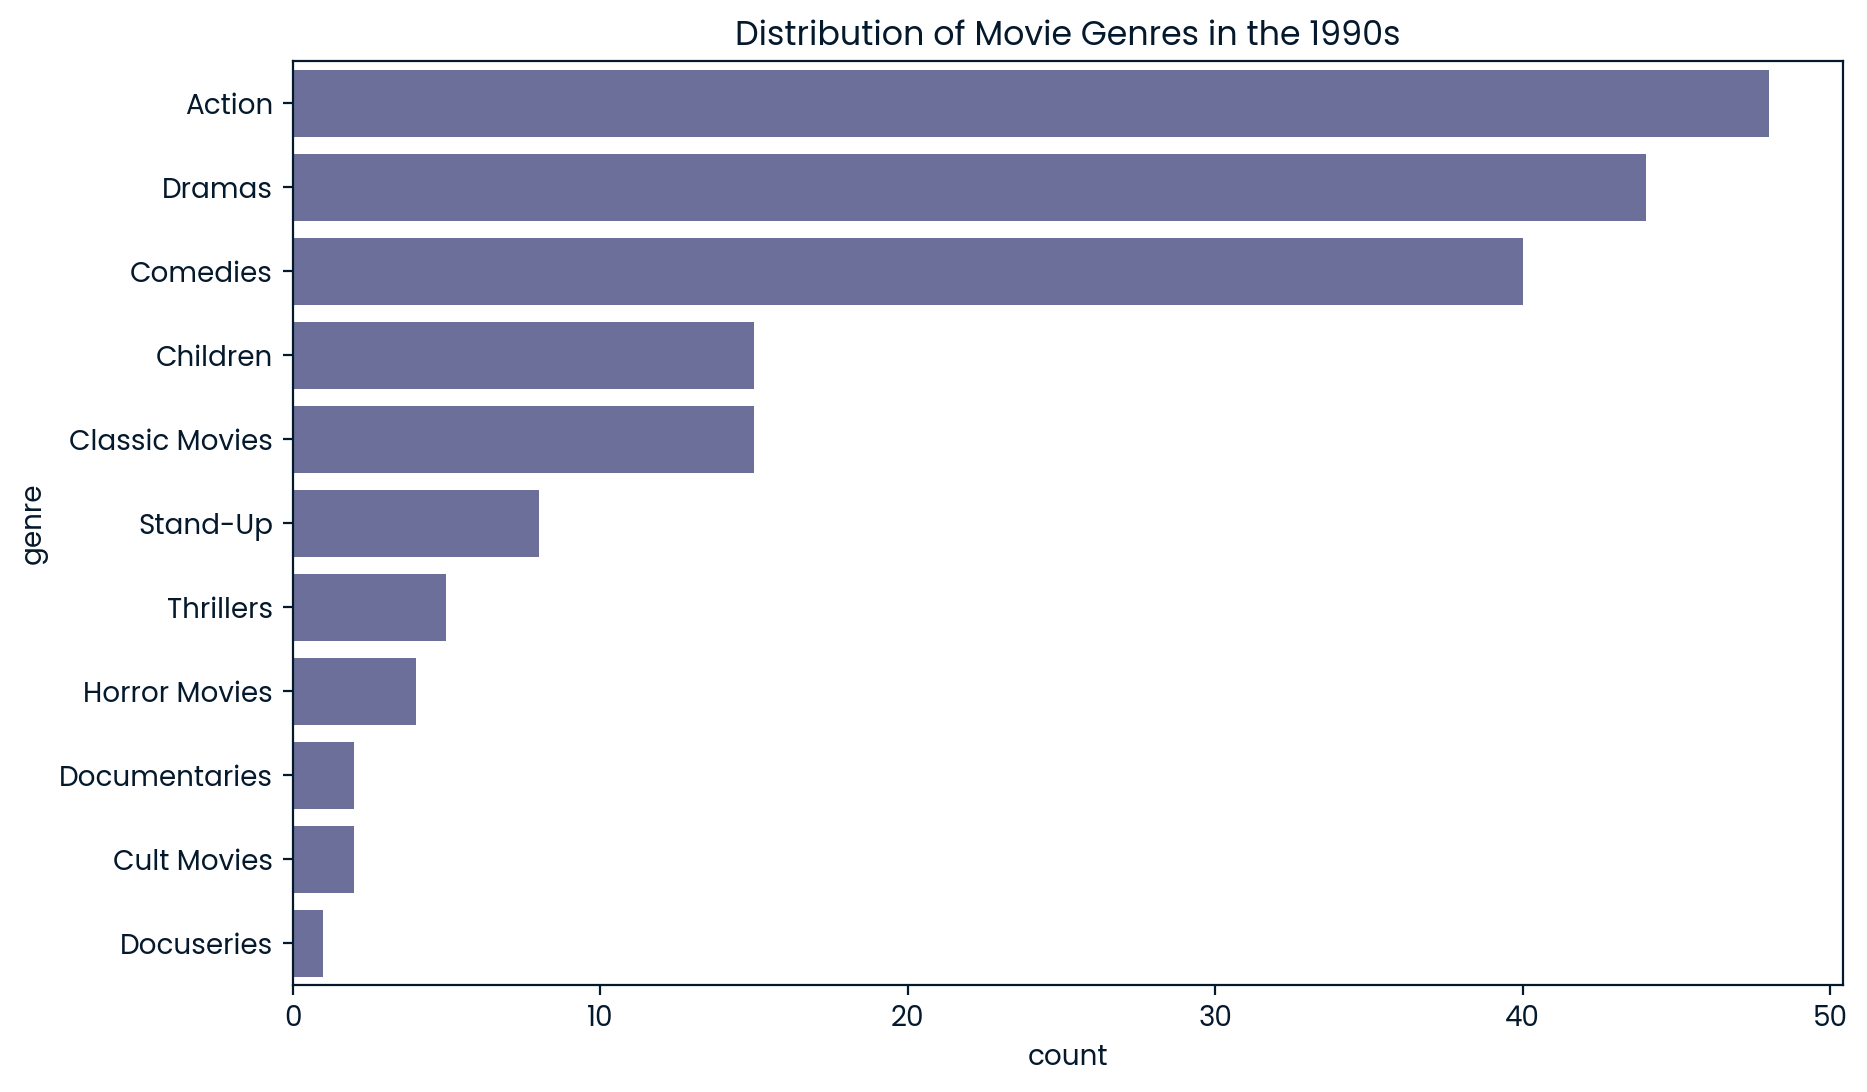

In [48]:
# Count the number of movies per genre
genre_counts = df_1990s['genre'].value_counts()

# Visualize the genre distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1990s, y='genre', order=genre_counts.index)
plt.title('Distribution of Movie Genres in the 1990s')
plt.show()

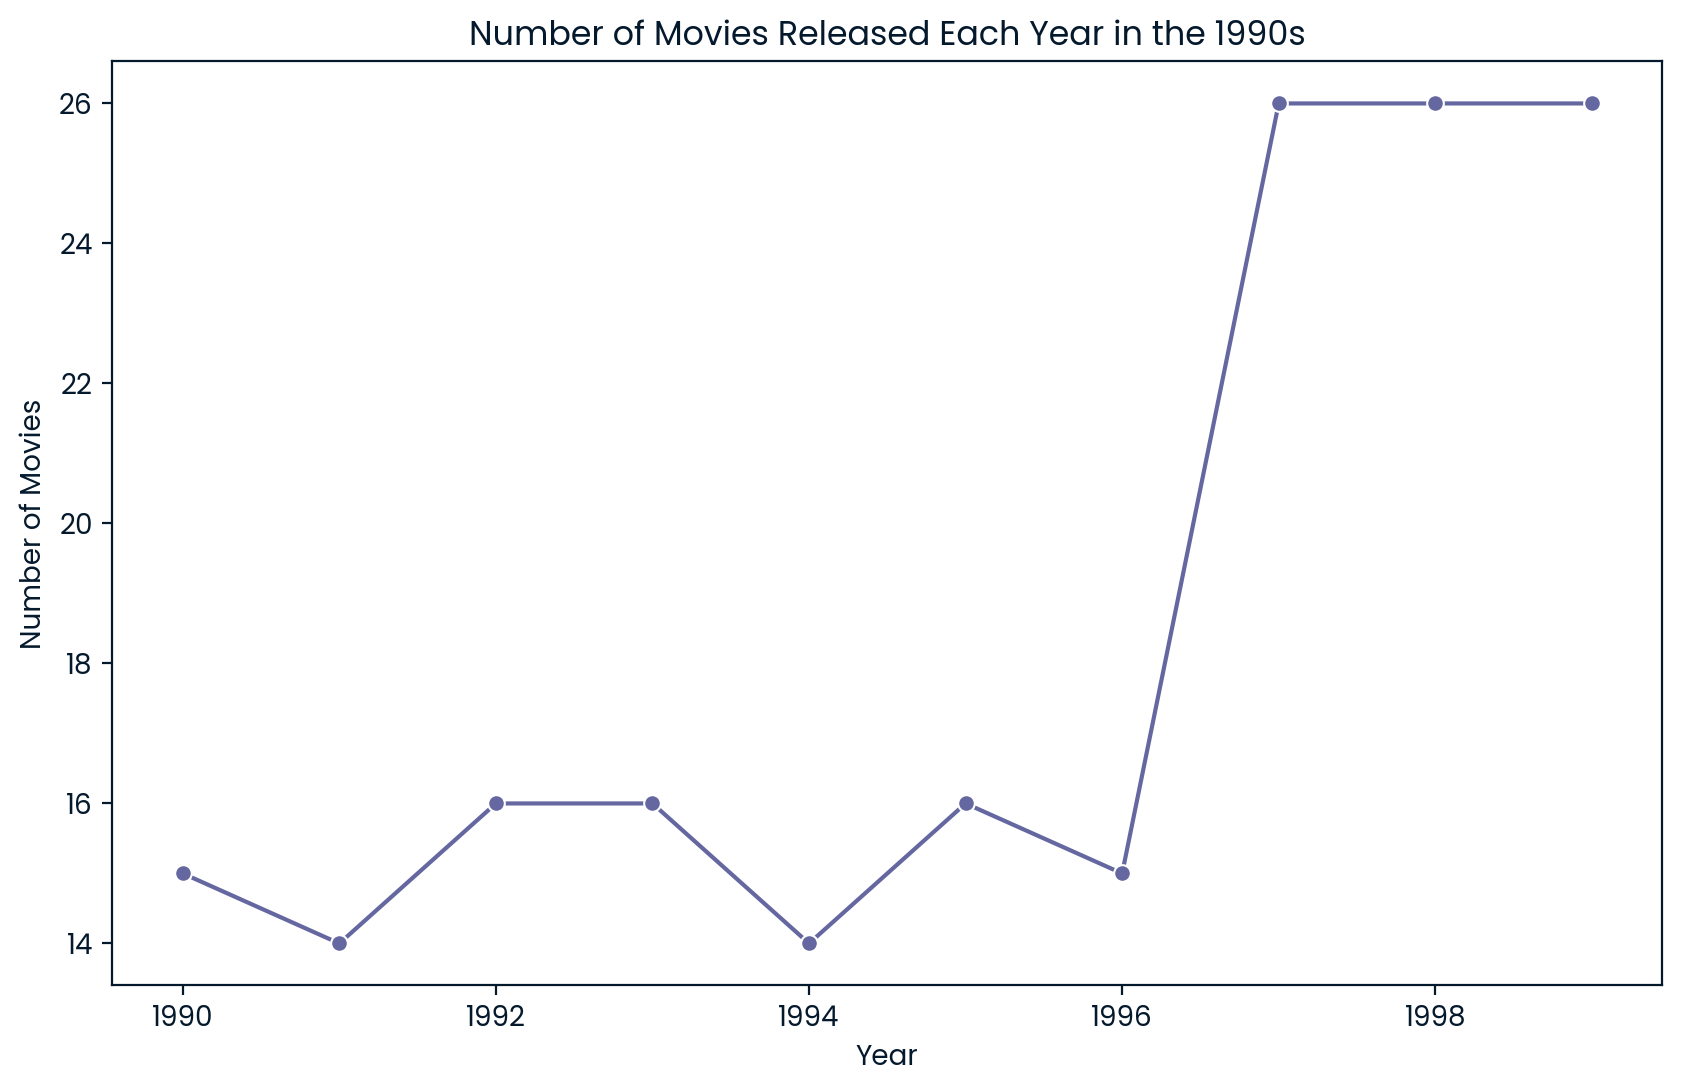

In [49]:
# Count the number of movies per year
year_counts = df_1990s['release_year'].value_counts().sort_index()

# Plot the distribution of movies released each year
plt.figure(figsize=(10, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Number of Movies Released Each Year in the 1990s')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [50]:
df_1990s['duration'].dtype

dtype('int64')

In [51]:
# Check for any NaN or non-numeric values
df_1990s['duration'].isnull().sum()  # Check for NaN values

0

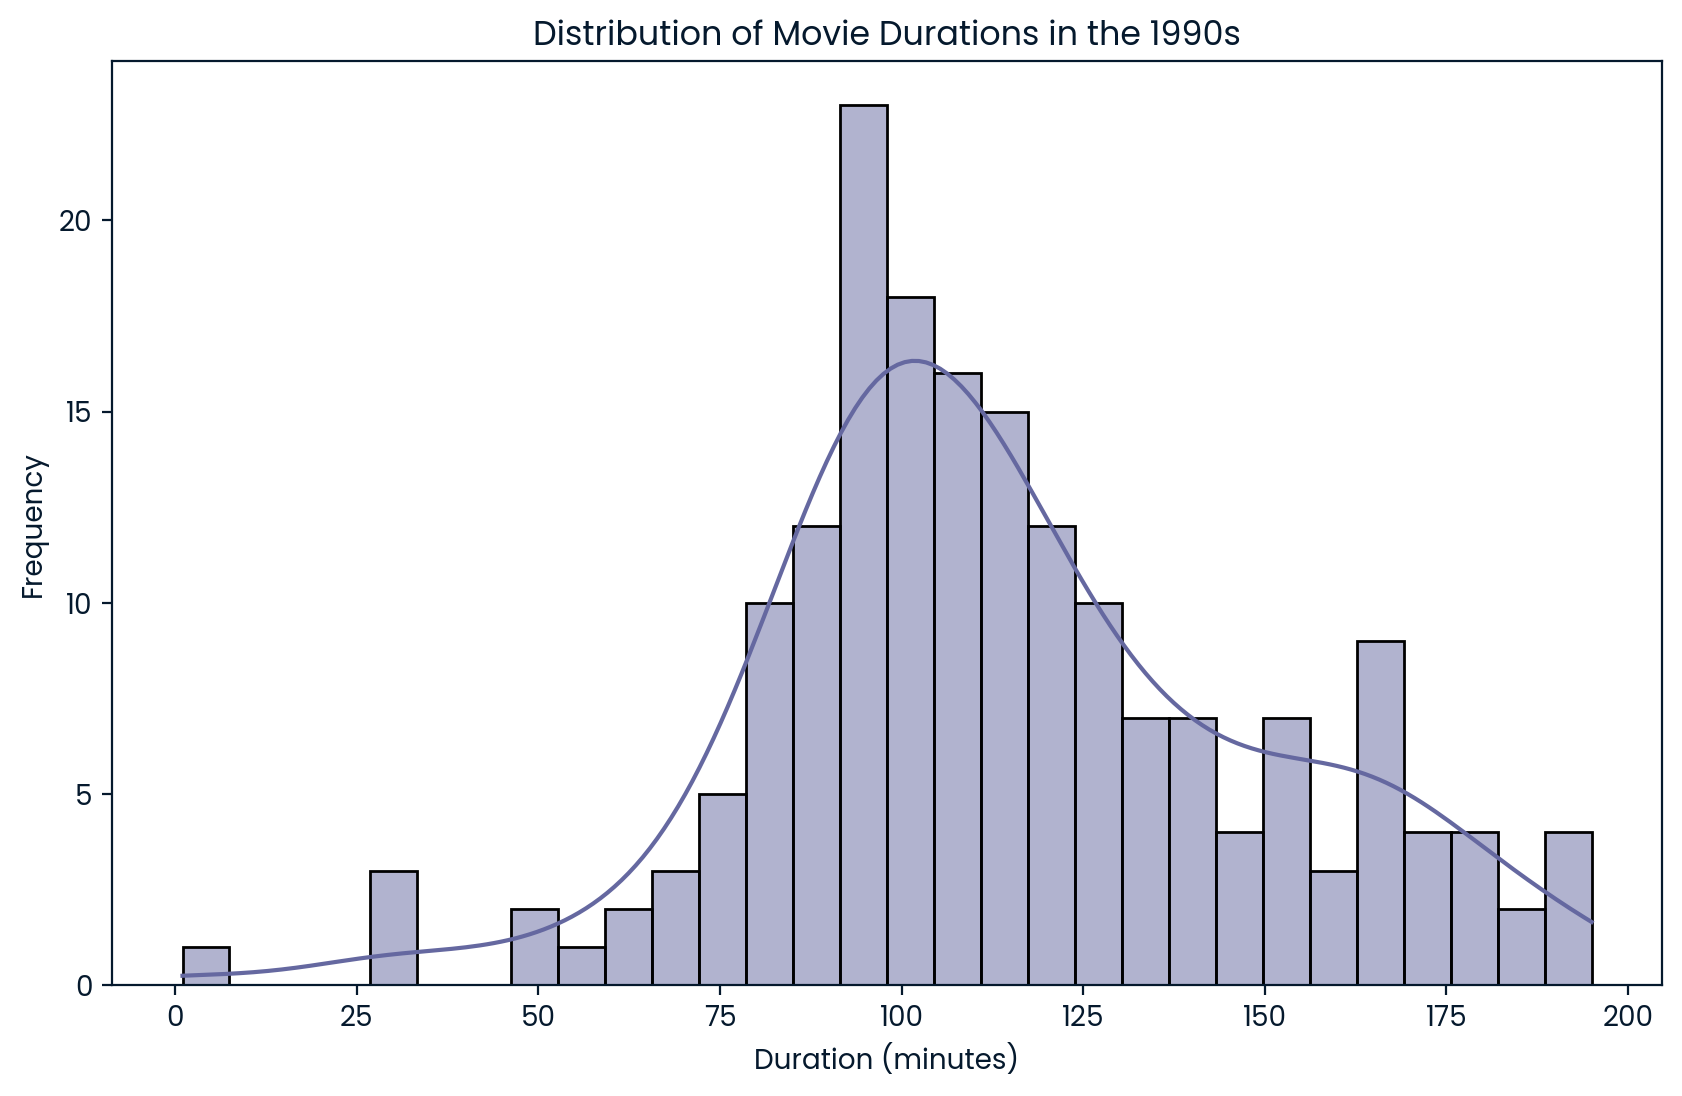

In [52]:
# Plot the distribution of movie durations
plt.figure(figsize=(10, 6))
sns.histplot(df_1990s['duration'], kde=True, bins=30)
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

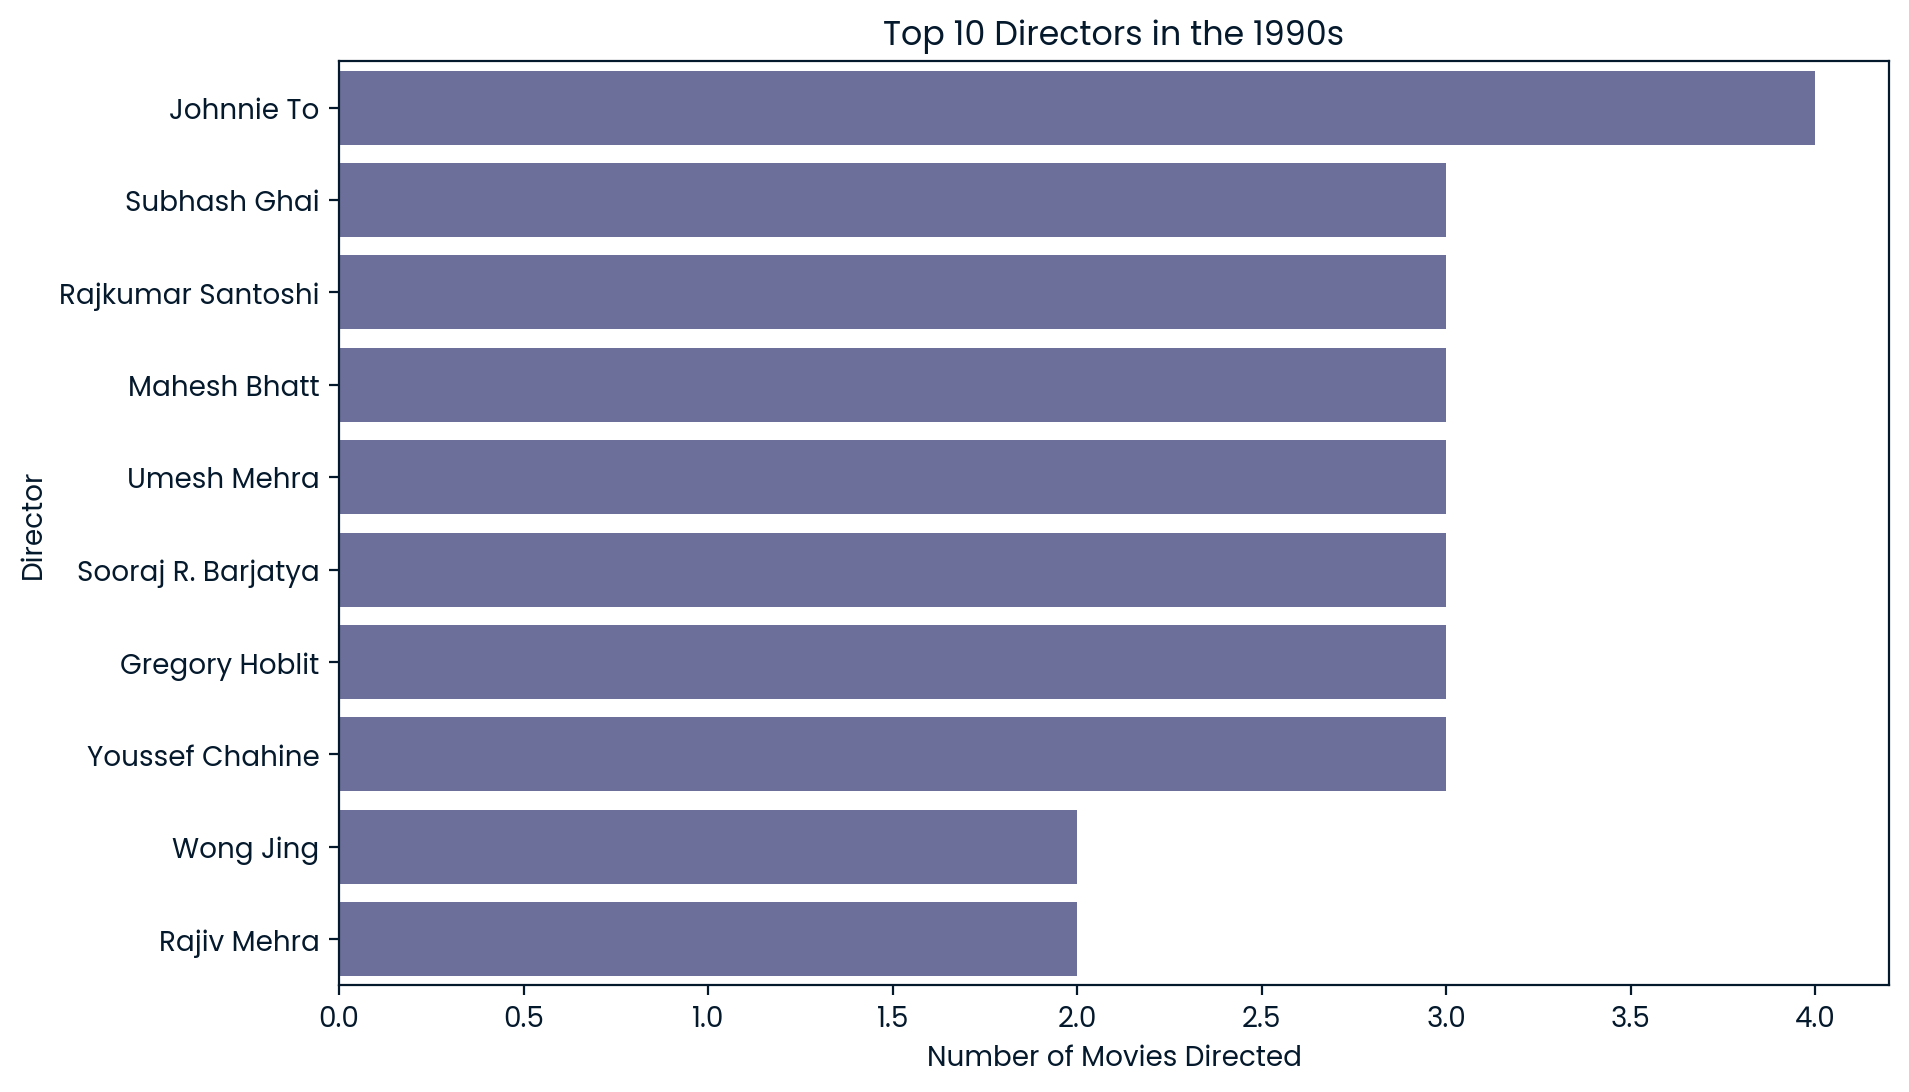

In [53]:
# Count the top 10 most frequent directors
top_directors = df_1990s['director'].value_counts().head(10)

# Plot the top directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors in the 1990s')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Director')
plt.show()

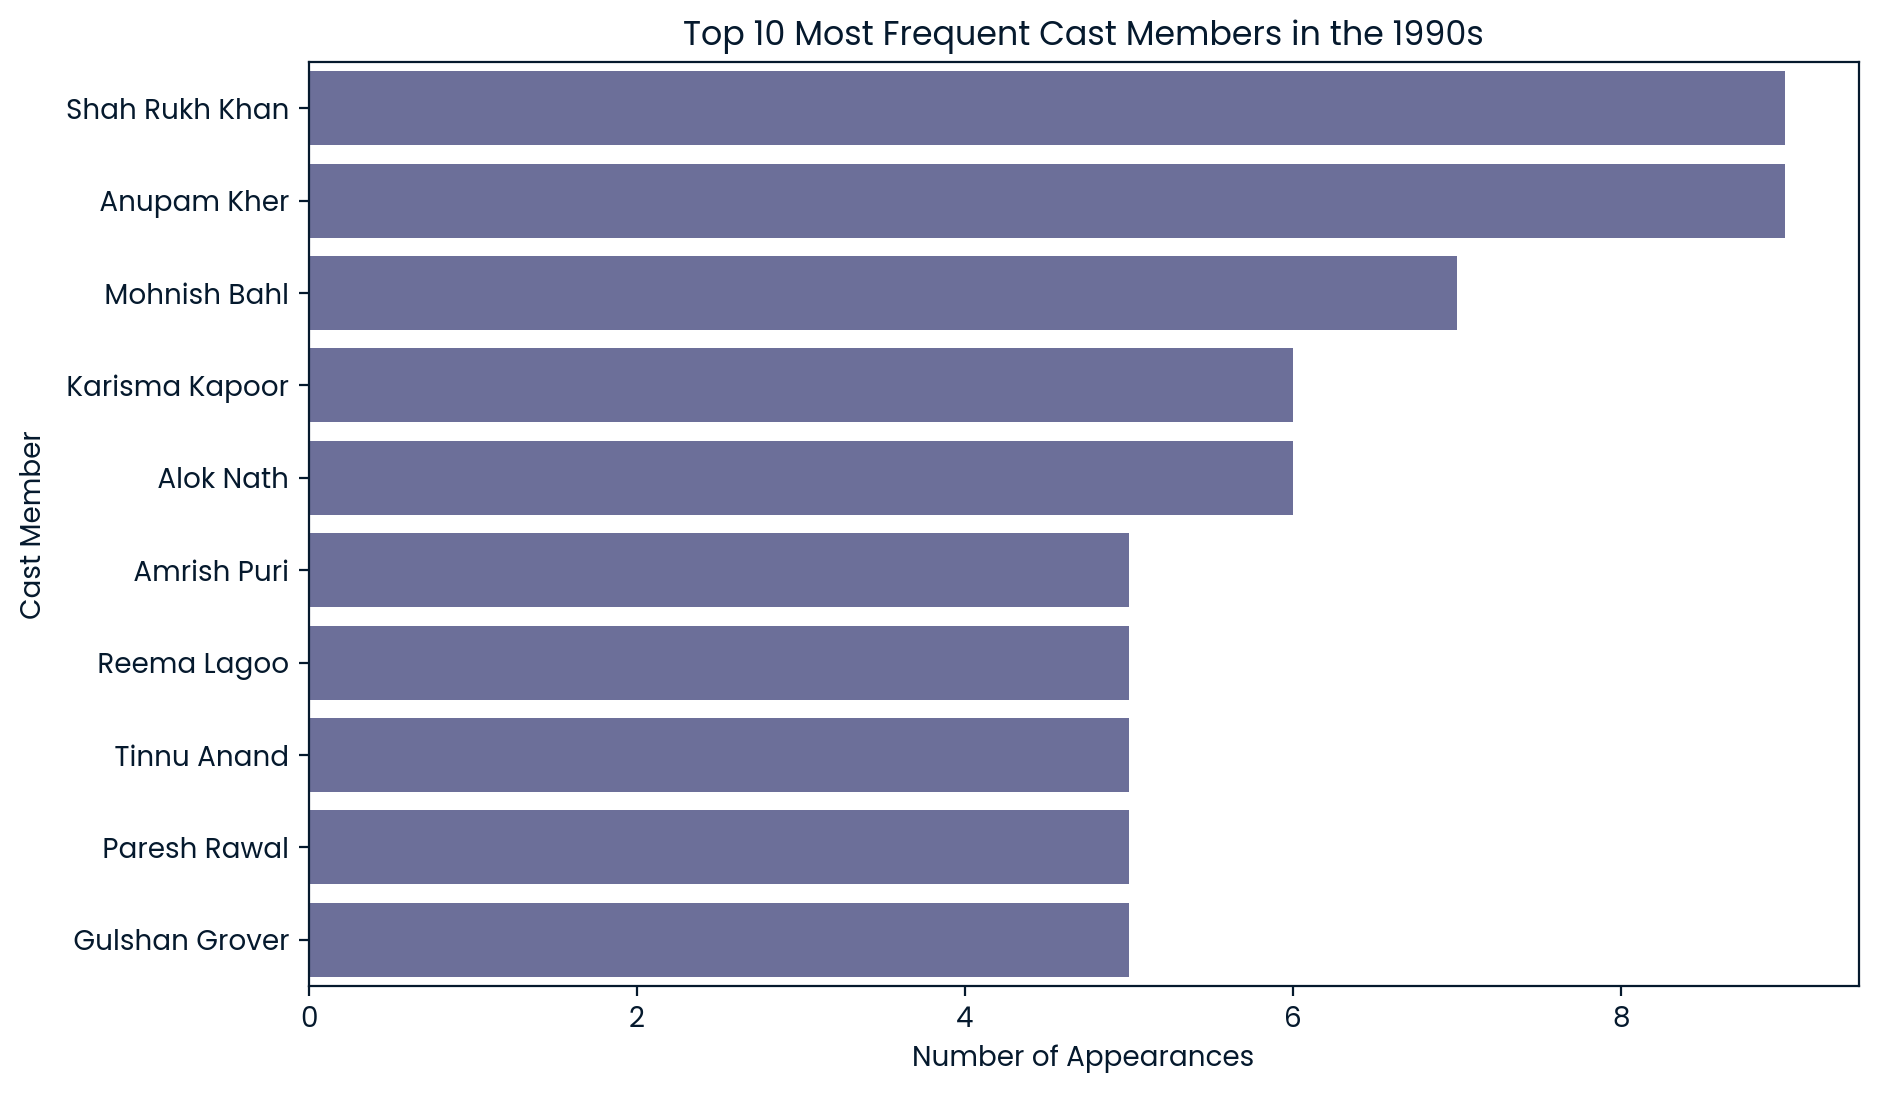

In [54]:
# Split the cast column to extract individual cast members (assuming it's a comma-separated list)
df_1990s['cast'] = df_1990s['cast'].str.split(',')

# Flatten the list of casts into a single list
all_cast = [cast for sublist in df_1990s['cast'] for cast in sublist]

# Convert the list into a Series and count the most common names
cast_counts = pd.Series(all_cast).value_counts().head(10)

# Plot the top cast members
plt.figure(figsize=(10, 6))
sns.barplot(x=cast_counts.values, y=cast_counts.index)
plt.title('Top 10 Most Frequent Cast Members in the 1990s')
plt.xlabel('Number of Appearances')
plt.ylabel('Cast Member')
plt.show()

In [55]:
# Check for missing values in the 'duration' column
df_1990s['duration'] = pd.to_numeric(df_1990s['duration'], errors='coerce')

# Find the most frequent duration in the 1990s
most_frequent_duration = df_1990s['duration'].mode()[0]

# Save the result as an integer variable
duration = int(most_frequent_duration)

# Print the result
print(f"The most frequent movie duration in the 1990s is {duration} minutes.")

The most frequent movie duration in the 1990s is 94 minutes.


In [56]:
# Filter for action movies in the 1990s
action_movies_1990s = df_1990s[df_1990s['genre'].str.contains('Action', case=False, na=False)]

# Filter for short action movies (less than 90 minutes)
short_action_movies = action_movies_1990s[action_movies_1990s['duration'] < 90]

# Count the number of short action movies
short_movie_count = short_action_movies.shape[0]

# Print the result
print(f"The number of short action movies (less than 90 minutes) released in the 1990s is {short_movie_count}.")

The number of short action movies (less than 90 minutes) released in the 1990s is 7.
